# Expression for simplified likelihood


$$L_s(\mu,\theta)=\prod_{i=1}^{N}{\frac{(\mu\cdot s_i+b_i+\theta_i)^{n_i}e^{-(\mu\cdot s_i+b_i+\theta_i)}}{n_i!}}\cdot exp\; ( \;   -\frac{1}{2}\theta^TV^{-1}\theta) $$


# Log likelihood will be:

$$[\sum_{i=1}^{N}{n_i\ln(\mu\cdot s_i+b_i+\theta_i) -(\mu\cdot s_i+b_i+\theta_i) - \ln n_i!}]\; -\frac{1}{2} \theta^TV^{-1}\theta$$

# In case of no-correlation, log likelihood will take the form:

$$[\sum_{i=1}^{N}{n_i\ln(\mu\cdot s_i+b_i+\theta_i) -(\mu\cdot s_i+b_i+\theta_i) - \ln n_i!}]\; -\frac{1}{2}\sum_1^N{V^{-1}_{ii}\theta_i^2}$$

# MLE for $\mu$ :

$$\sum_{i=1}^N{\frac{n_i\cdot s_i}{\hat{\mu} \cdot s_i+b_i+\theta_i}} = \sum_{i=1}^N{s_i}$$

# MLE for $\theta_i$:

$$\frac{n_i}{\mu \cdot s_i+b_i+\hat{\theta_i}}=1+V_{ii}^{-1}\hat{\theta_i}$$

$$\hat{\theta_i}=\frac{-(\mu \cdot s_i \cdot V_{ii}^{-1}+b_i \cdot V_{ii}^{-1}+1)+\sqrt{(\mu \cdot s_i \cdot V_{ii}^{-1}+b_i \cdot V_{ii}^{-1}+1)^2 \; -4\cdot V_{ii}^{-1}(\mu \cdot s_i+b_i-n_i)}}{2 V_{ii}^{-1}}$$

## These are 9 MLE equations, but they can't be solved seperately
### So we will use profile likelihood to profile out our $\mu$ from nuisance parameter $\theta$

## calculating $V^{-1}$:

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

In [84]:
signal_temp=np.loadtxt('./signal.dat', usecols=(1))
events=np.loadtxt('./data1703.dat', usecols=0,skiprows=1)
bkg=np.loadtxt('./data1703.dat', usecols=1,skiprows=1)
event=np.loadtxt('./data1703.dat', dtype=int, usecols=0,skiprows=1)
bin_size=np.loadtxt('./data1703.dat', usecols=3,skiprows=1)
bkg_err=np.loadtxt('./data1703.dat', usecols=4,skiprows=1)
signal=np.array([152.898, 110.269, 82.4174,  83.5542 , 61.3867,  64.2287,  48.3136,  31.2618 , 25.5778 , 16.4835
, 21.0306 , 14.7783 , 11.3679  ,10.2311 ,  2.84198,  2.27358 , 1.70519 , 3.97877,
  0.    ,   2.84198,  1.70519 , 4.54717])

In [85]:
#######Initialising matrix########

corr_mat=np.loadtxt('./correlation_MONOJ.dat',usecols=range(22))
corr_mat=np.flipud(corr_mat)


#########Getting covariance matirx from correlation matrix############

std_dev_mat=np.diag(bkg_err)

covar_mat_temp=np.matmul(std_dev_mat,corr_mat)
covar_mat=np.matmul(covar_mat_temp,std_dev_mat)
diag_V=np.diag(np.diag(covar_mat))
inv_diag_V=np.linalg.inv(diag_V)



In [86]:
x_givenn=np.loadtxt('./pub_sl_monoj.dat',skiprows=2,usecols=0)
y_givenn=np.loadtxt('./pub_sl_monoj.dat',skiprows=2,usecols=1)

In [87]:
filename=['theta1.dat','theta2.dat','theta3.dat','theta4.dat','theta5.dat','theta6.dat','theta7.dat','theta8.dat','theta9.dat','theta10.dat','theta11.dat','theta12.dat','theta13.dat','theta14.dat','theta15.dat','theta16.dat','theta17.dat','theta18.dat','theta19.dat','theta20.dat','theta21.dat','theta22.dat']

In [88]:
# We will take a lot of \mu from 0 to 2 with a gap of 0.01
# And for each \mu will calculate MLE of \theta_i
for i in tqdm(range(22)):
    u=0
    f=open(filename[i],'w')
    for j in range(500):
        u=-2.0+j*0.01
        # For MLE of \theta we have to solve the quatratic equation
        a=inv_diag_V[i,i]
        b=u*signal[i]*a+bkg[i]*a+1
        c=u*signal[i]+bkg[i]-events[i]
        theta=(-b+math.sqrt(math.pow(b,2)-4*a*c))/(2*a)
        f.write('%1i    %1.2f   %5.5f  \n' % (i+1,u,  theta))
f.close()
        

100%|██████████| 22/22 [00:00<00:00, 109.76it/s]


In [89]:
# Now we will calculate different values of log likelihood with varying \mu and calculated MLE of \theta for each \mu
theta1=np.loadtxt('theta1.dat', usecols=(2))
theta2=np.loadtxt('theta2.dat', usecols=(2))
theta3=np.loadtxt('theta3.dat', usecols=(2))
theta4=np.loadtxt('theta4.dat', usecols=(2))
theta5=np.loadtxt('theta5.dat', usecols=(2))
theta6=np.loadtxt('theta6.dat', usecols=(2))
theta7=np.loadtxt('theta7.dat', usecols=(2))
theta8=np.loadtxt('theta8.dat', usecols=(2))
theta9=np.loadtxt('theta9.dat', usecols=(2))
theta10=np.loadtxt('theta10.dat', usecols=(2))
theta11=np.loadtxt('theta11.dat', usecols=(2))
theta12=np.loadtxt('theta12.dat', usecols=(2))
theta13=np.loadtxt('theta13.dat', usecols=(2))
theta14=np.loadtxt('theta14.dat', usecols=(2))
theta15=np.loadtxt('theta15.dat', usecols=(2))
theta16=np.loadtxt('theta16.dat', usecols=(2))
theta17=np.loadtxt('theta17.dat', usecols=(2))
theta18=np.loadtxt('theta18.dat', usecols=(2))
theta19=np.loadtxt('theta19.dat', usecols=(2))
theta20=np.loadtxt('theta20.dat', usecols=(2))
theta21=np.loadtxt('theta21.dat', usecols=(2))
theta22=np.loadtxt('theta22.dat', usecols=(2))
theta=[theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8,theta9,theta10,theta11,theta12,theta13,theta14,theta15,theta16,theta17,theta18,theta19,theta20,theta21,theta22]


In [90]:
f=open('llh.dat','w')
for i in tqdm(range(500)):
    u=-2.0+i*0.01
    sum1=0
    for j in range(22):
        d=u*signal[j]+bkg[j]+theta[j][i]
        e=events[j]*math.log(d)-d-math.log(math.factorial(event[j]))-(1/2)*inv_diag_V[j,j]*math.pow(theta[j][i],2)
        sum1=sum1+e
    f.write('%1.2f    %8.5f  \n'% (u,sum1))
f.close()

100%|██████████| 500/500 [05:46<00:00,  1.44it/s]


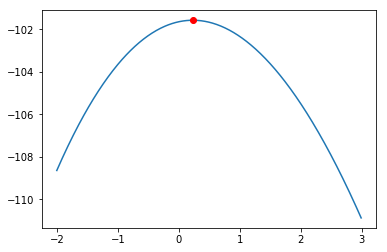

In [92]:
x1=np.loadtxt('llh.dat', usecols=0)
y=np.loadtxt('llh.dat', usecols=1)
plt.plot(x1,y)
plt.plot(.23,-101.57559 , 'ro')
plt.show()

## From the file 'llh.dat' we can see that highest value of the likelihood occurs at 1.26
## so MLE for $\mu$:

$$\hat{\mu}=1.26$$

### $\hat{\theta}$ correspondind to $\mu$=1.26: from the file

### $\hat{\theta}=-90.92446,1.45104,-18.11897,14.00296,6.64476,0.65937,-1.43382,0.45373$

# LIkelihood ratio test: $q(\mu) vs \mu$

### From 'llh.dat' file we get the value of log likelihood at $\mu=1.26$ and at estimated $\theta$ as:
###                       $ -27.32392$

In [93]:
llh=-101.57559 

### calculating q($\mu$) for different $\mu$

In [94]:
# q(u):
llh1=np.loadtxt('llh.dat', usecols=1)
q_u_noco=(llh1-llh)*(-2)

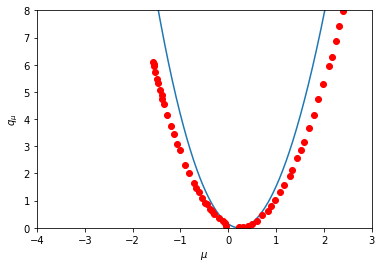

In [95]:
plt.plot(x1,q_u_noco)
plt.plot(x_givenn,y_givenn, 'ro')
plt.axis([-4,3,0,8])
plt.xlabel('$\mu$')
plt.ylabel('$q_{\mu}$')
# plt.legend(['claculated','published'])
# plt.title("no correlation case")
plt.show()

In [65]:
%store x1

Stored 'x1' (ndarray)


In [66]:
%store q_u_noco

Stored 'q_u_noco' (ndarray)


In [69]:
%store y_givenn
%store x_givenn

Stored 'y_givenn' (ndarray)
Stored 'x_givenn' (ndarray)
